<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/anomaly_detection_for_time_series_sensor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

### Ejemplo extraído de https://www.kaggle.com/code/pinakimishrads/anomaly-detection-for-time-series-sensor-data/notebook

In [ ]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style = "whitegrid",font_scale = 1.5)
%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]

In [ ]:
#importing Dataset
sensor_df = pd.read_csv('C:\\Curso Pronóstico\\Business DS\\sensor.csv')

In [ ]:
## Basic Exploration
print("The dataset has " , sensor_df.shape[0],"rows and", sensor_df.shape[1], "columns")

The dataset has  220320 rows and 55 columns


In [ ]:
#First and last 5 rows
sensor_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [ ]:
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

**DATA CLEANING**

In [ ]:
#no values for sensor 15 and unnamed column is unnecessary
sensor_df.drop(['sensor_15','Unnamed: 0'],inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
#check percentage of missing values for each column
(sensor_df.isnull().sum().sort_values(ascending=False)/len(sensor_df))*100

sensor_50         34.956881
sensor_51          6.982117
sensor_00          4.633261
sensor_07          2.474129
sensor_08          2.317992
sensor_06          2.177741
sensor_09          2.085603
sensor_01          0.167484
sensor_30          0.118464
sensor_29          0.032680
sensor_32          0.030864
sensor_17          0.020879
sensor_18          0.020879
sensor_22          0.018609
sensor_25          0.016340
sensor_16          0.014070
sensor_49          0.012255
sensor_48          0.012255
sensor_47          0.012255
sensor_46          0.012255
sensor_45          0.012255
sensor_44          0.012255
sensor_43          0.012255
sensor_42          0.012255
sensor_41          0.012255
sensor_40          0.012255
sensor_39          0.012255
sensor_38          0.012255
sensor_14          0.009532
sensor_26          0.009078
sensor_03          0.008624
sensor_10          0.008624
sensor_13          0.008624
sensor_12          0.008624
sensor_11          0.008624
sensor_05          0

In [ ]:
#too many missing values in sensor 50 , so dropping that
sensor_df.drop('sensor_50',inplace = True,axis=1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [ ]:
# convert time to index
sensor_df['index'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.index = sensor_df['index']

In [ ]:
#Drop index and timestamp columns
sensor_df.drop(['index','timestamp'],inplace = True,axis=1)
sensor_df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [ ]:
# Encoding de la variable dependiente

sensor_df["machine_status"].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [ ]:
sensor_df["Status"].value_counts()

Status
1    205836
2     14477
0         7
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing
aux1 = preprocessing.LabelEncoder()
y = pd.Series(aux1.fit_transform(sensor_df["machine_status"]), name = "Status")
y.index = sensor_df.index
y.unique()

array([1, 0, 2])

In [ ]:
sensor_df = pd.concat([sensor_df.drop("machine_status", axis=1), y], axis=1)
sensor_df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,Status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,231.1921,1
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,231.1921,1
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,232.0602,1


**Dealing with missing values**

In [ ]:
#imputing missing values with mean
sensor_df.fillna(sensor_df.mean(),inplace= True)
sensor_df.isnull().sum()

sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_51    0
Status       0
dtype: int64

**EDA**

In [ ]:
sensor_df.Status.value_counts()

Status
1    205836
2     14477
0         7
Name: count, dtype: int64

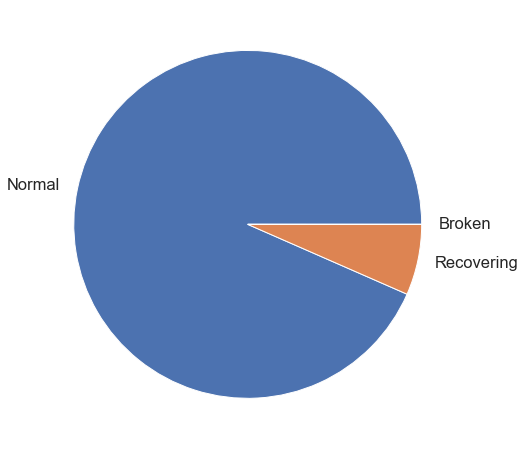

In [ ]:
#machine status -  pie chart
stroke_labels = ["Normal","Recovering","Broken"]
sizes = sensor_df.Status.value_counts()

plt.pie(x=sizes,labels=stroke_labels)
plt.show()

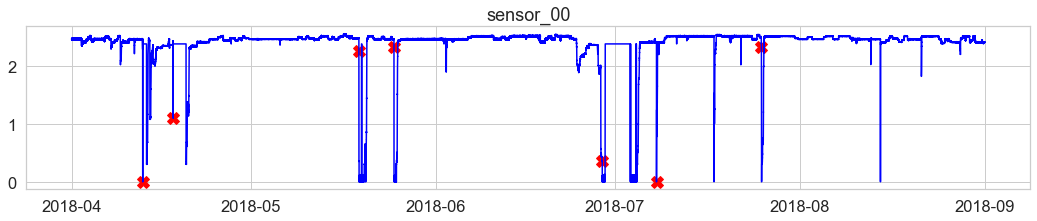

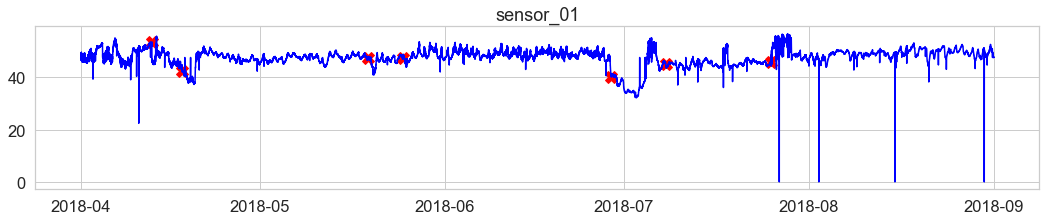

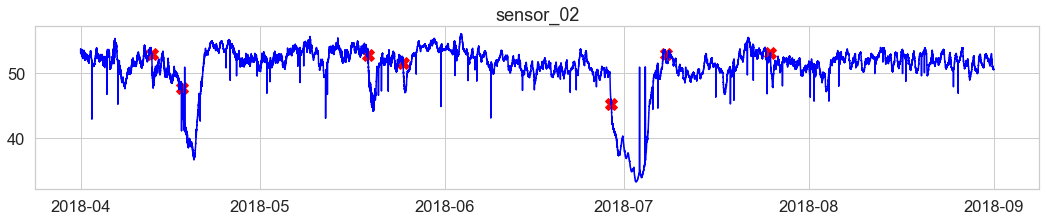

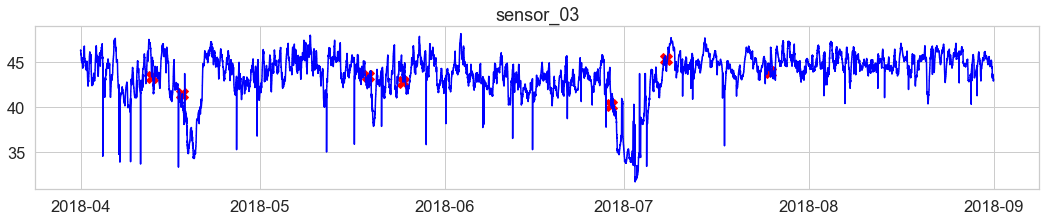

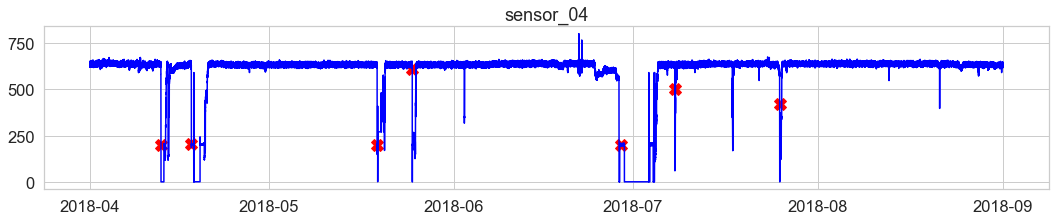

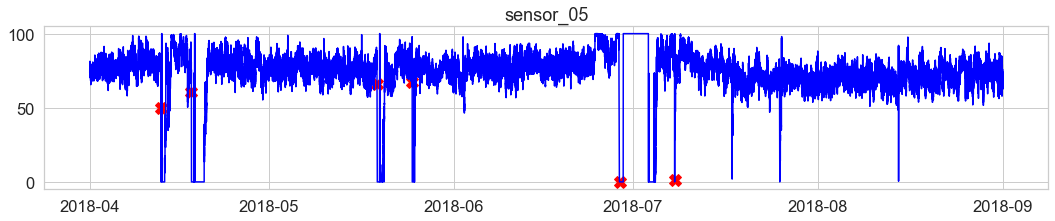

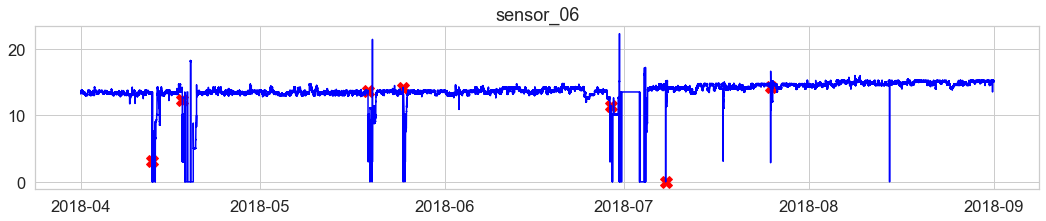

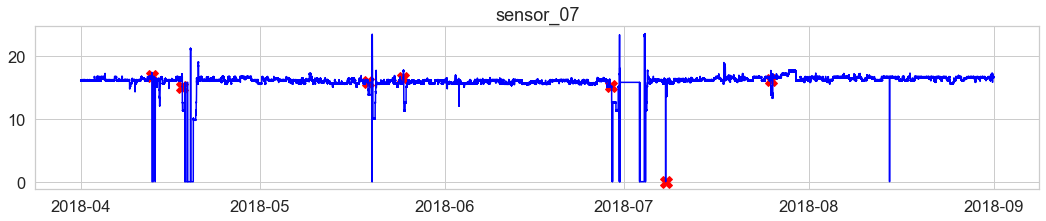

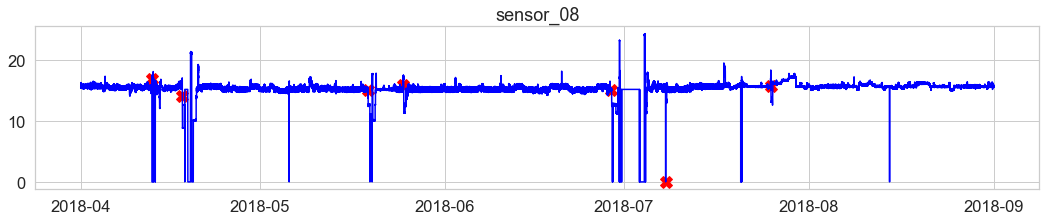

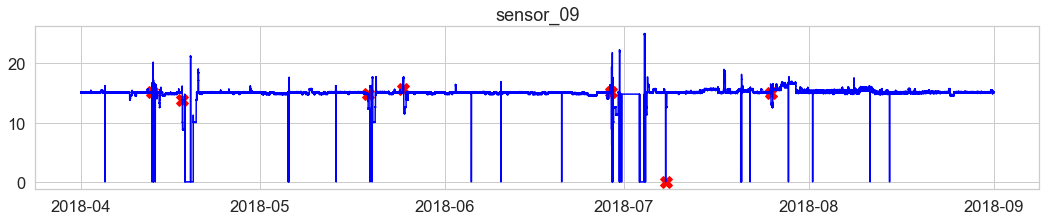

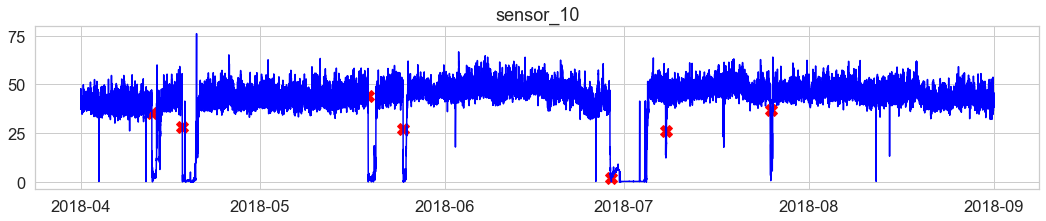

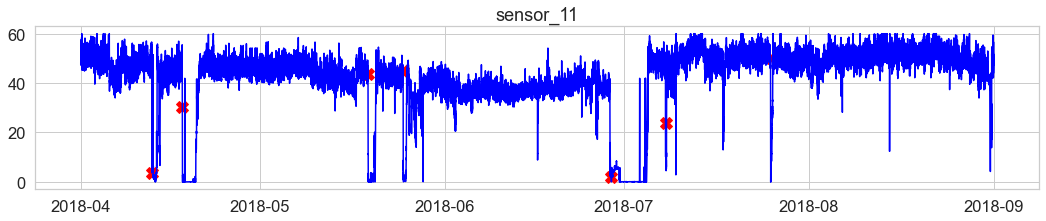

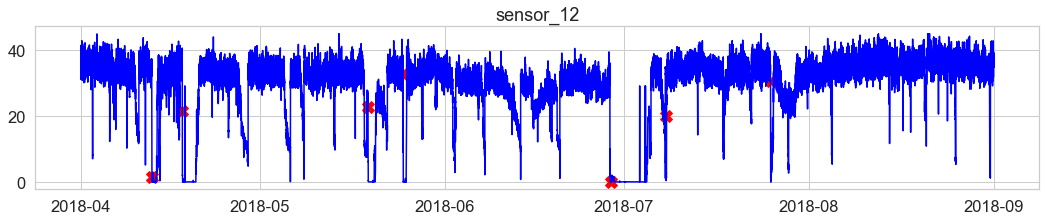

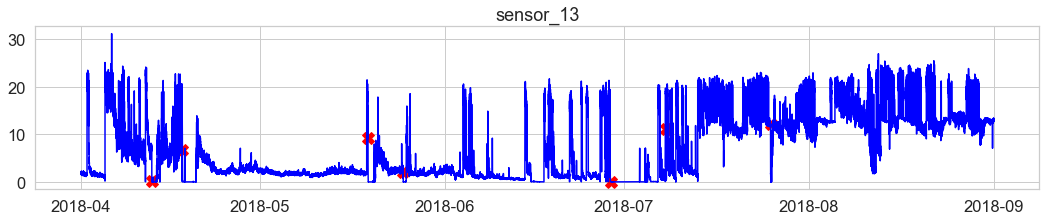

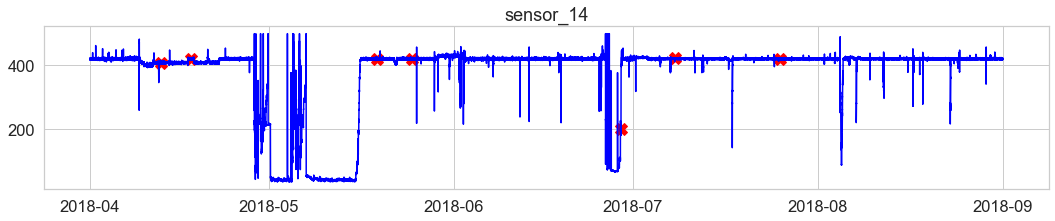

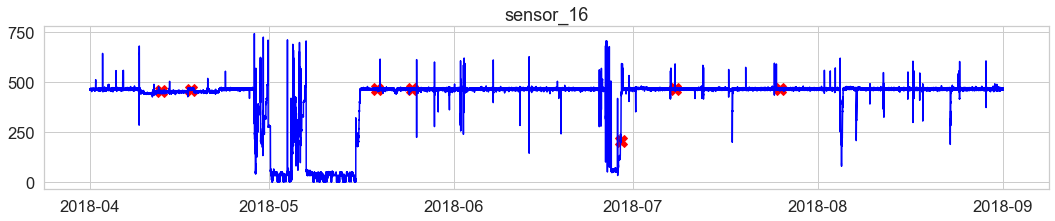

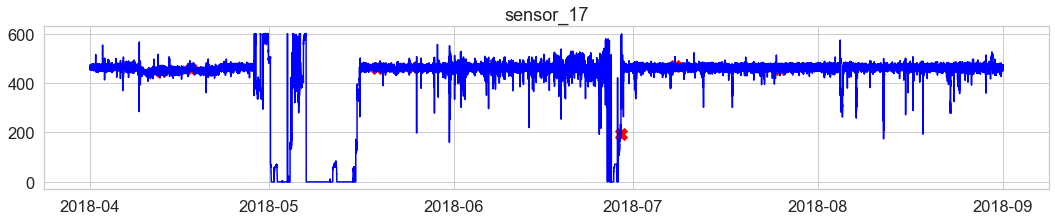

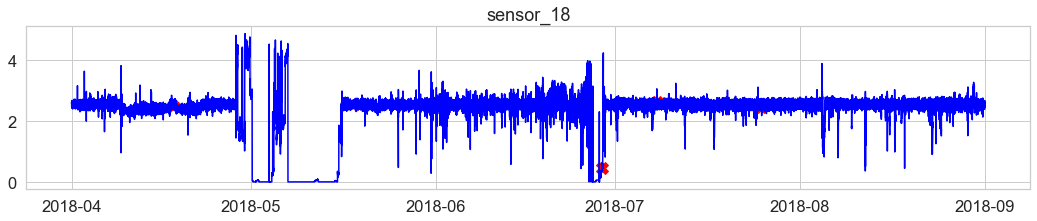

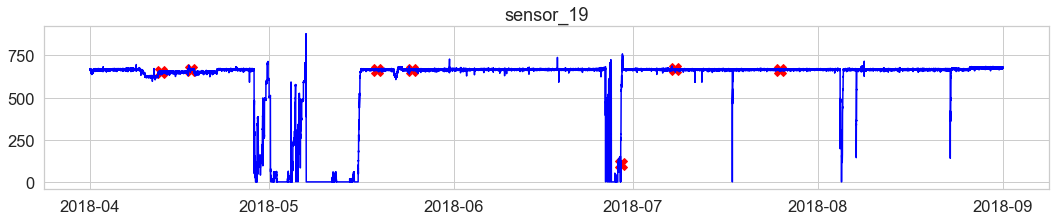

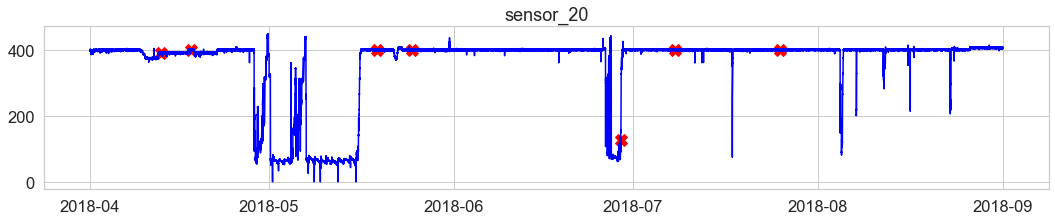

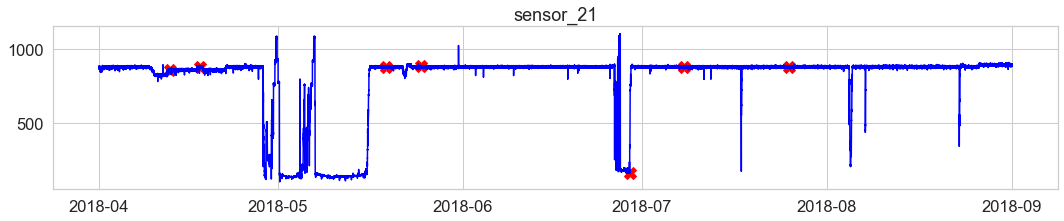

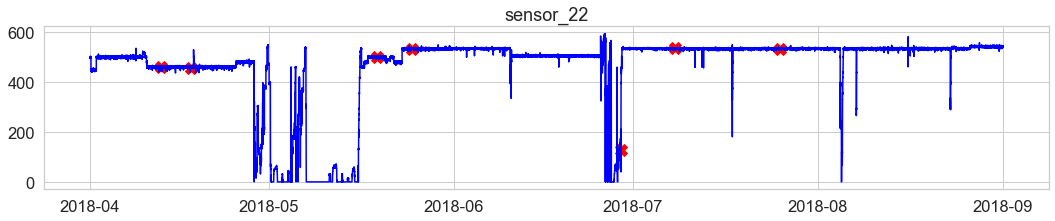

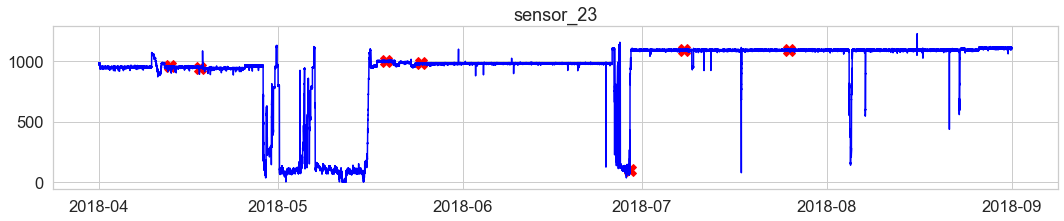

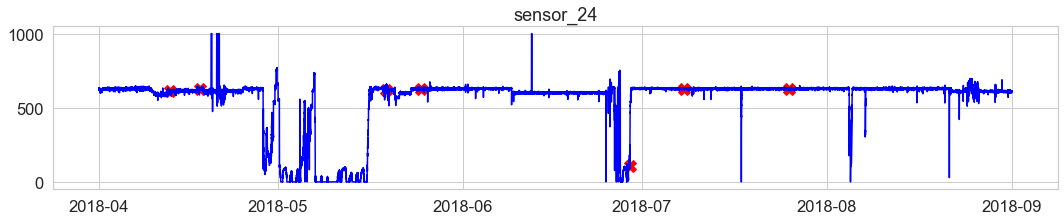

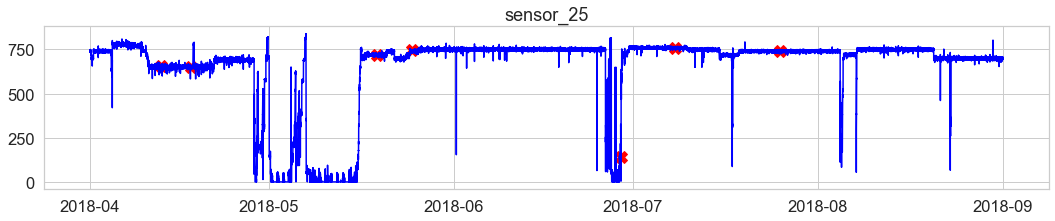

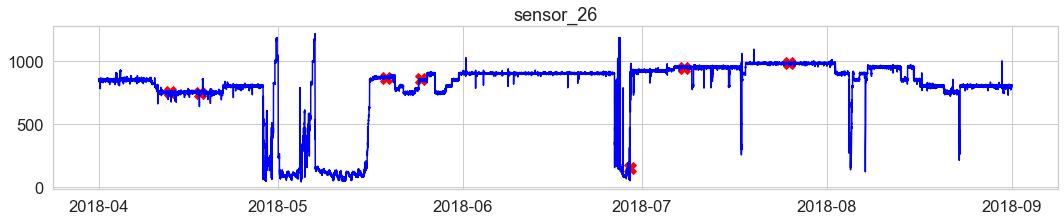

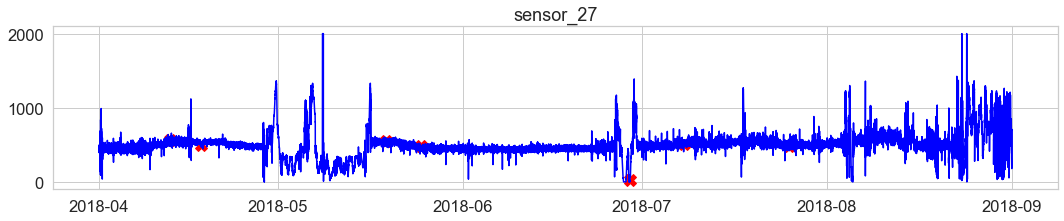

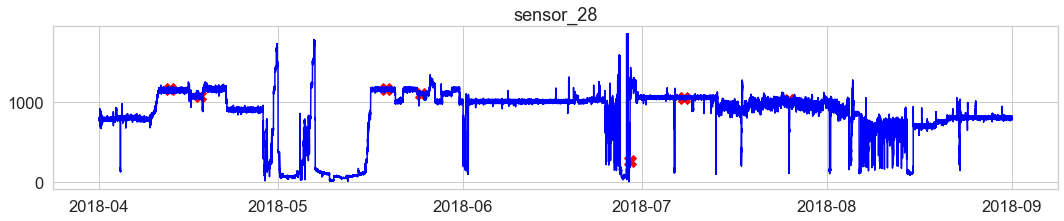

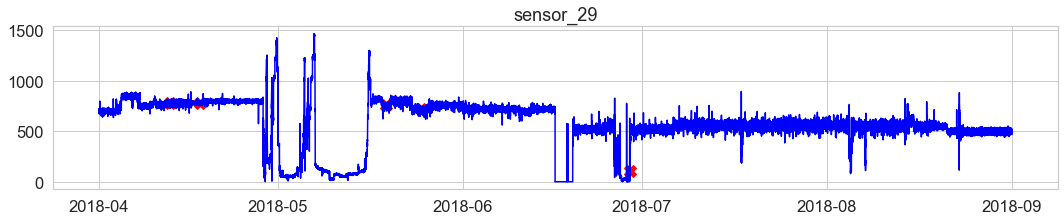

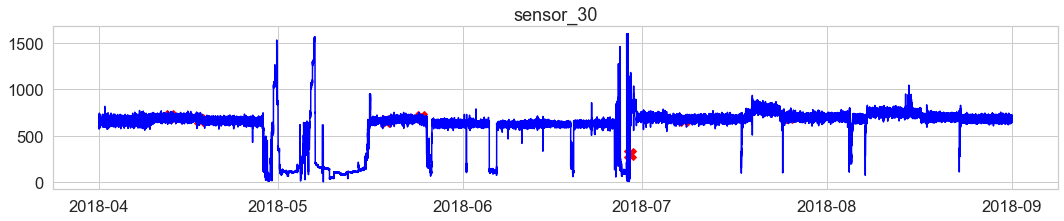

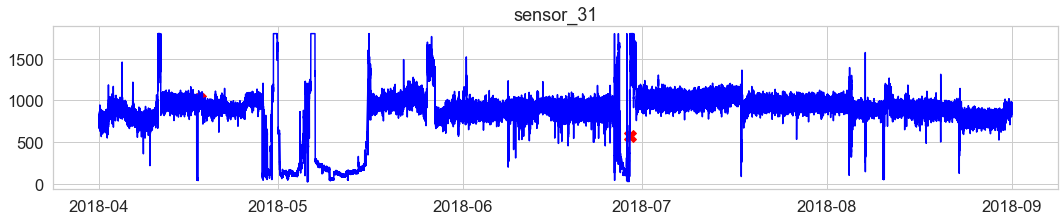

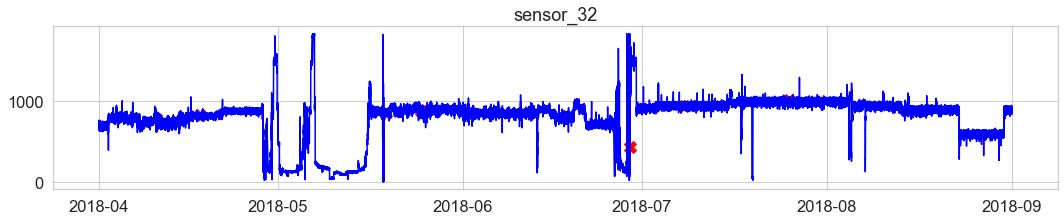

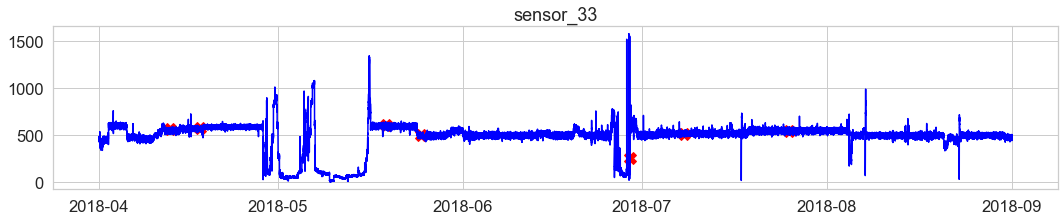

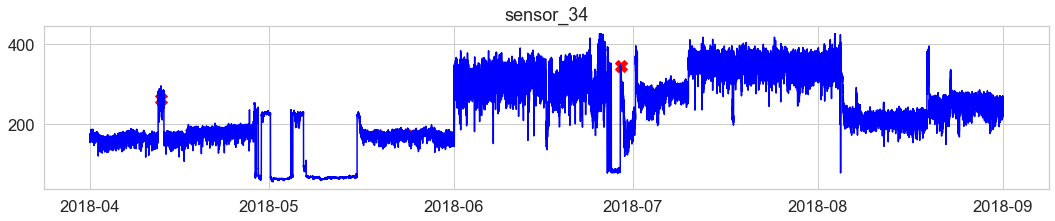

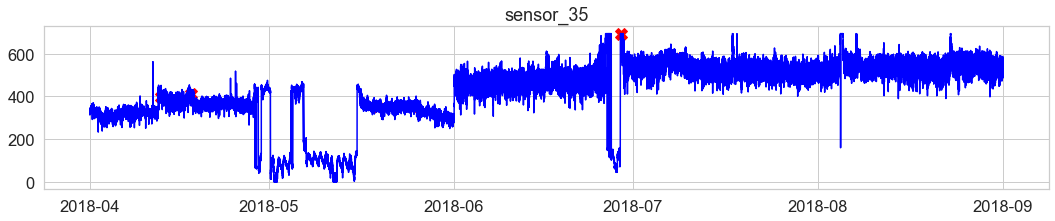

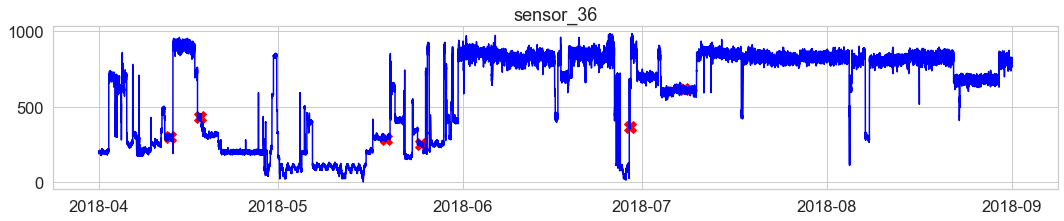

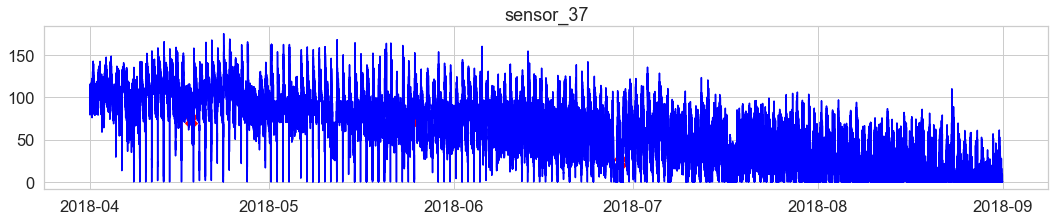

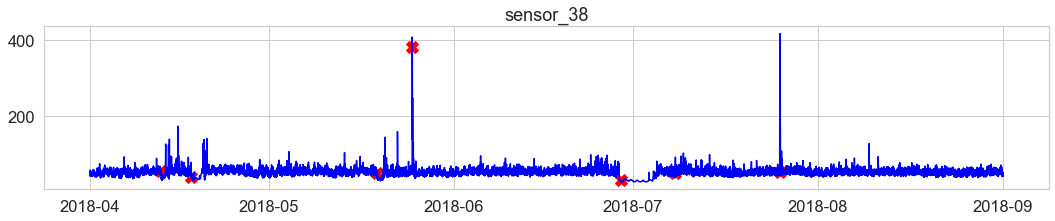

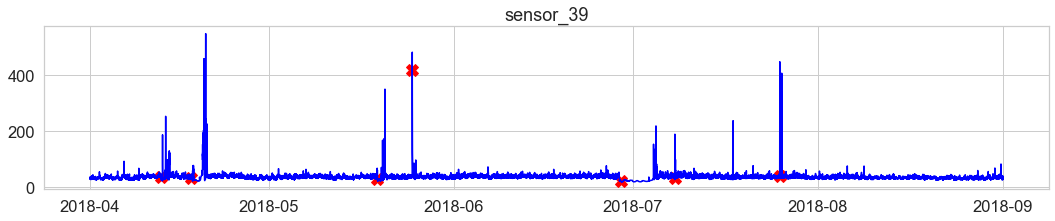

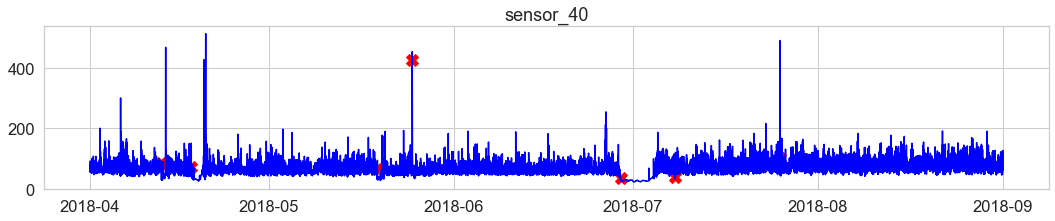

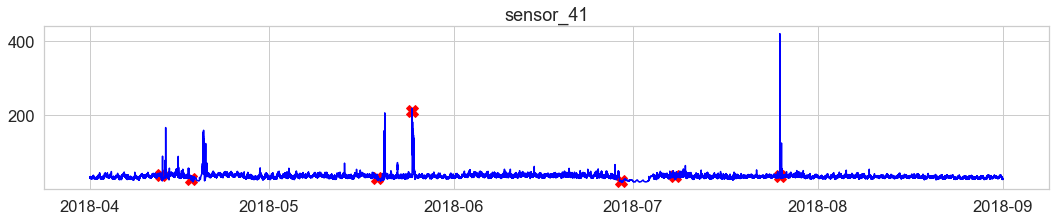

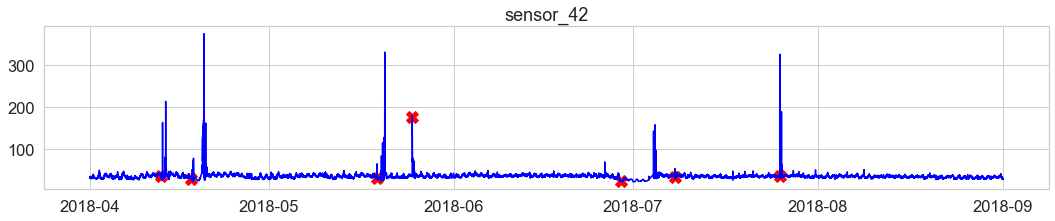

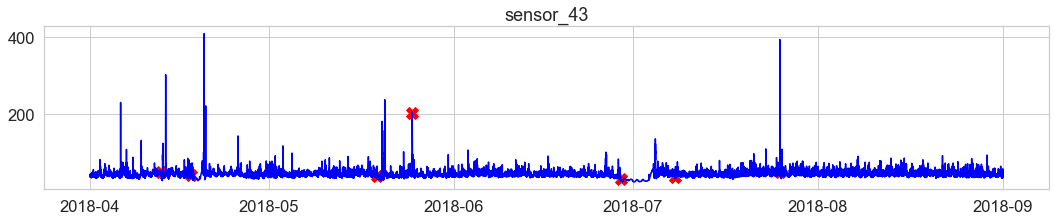

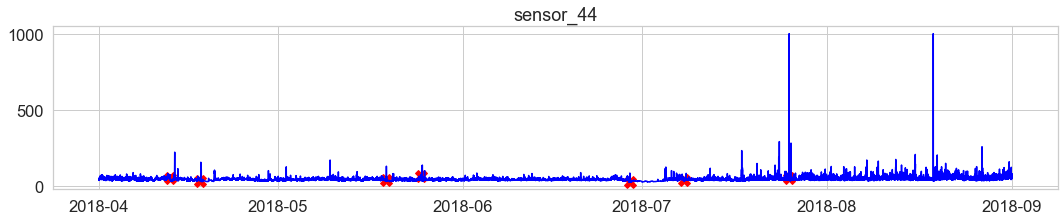

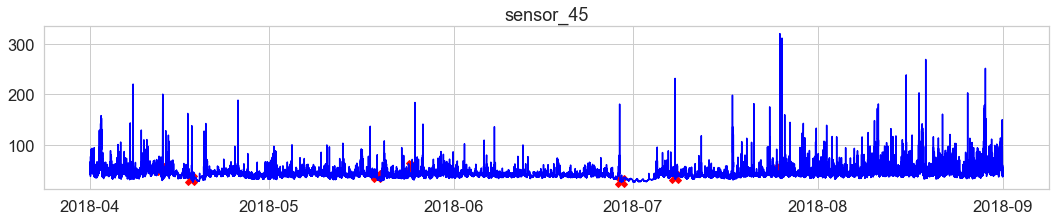

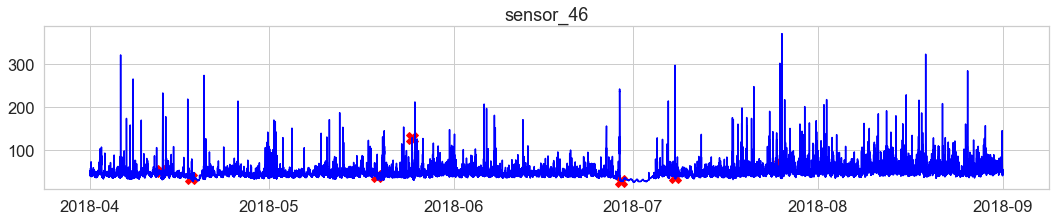

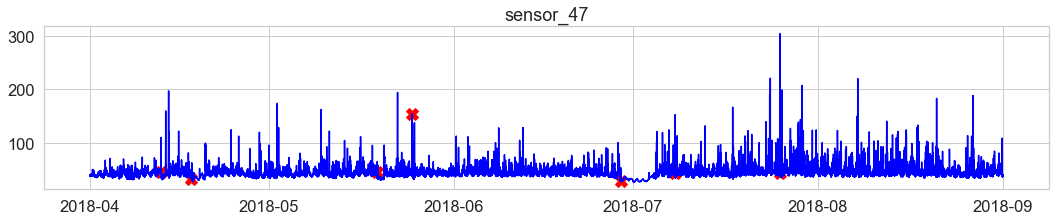

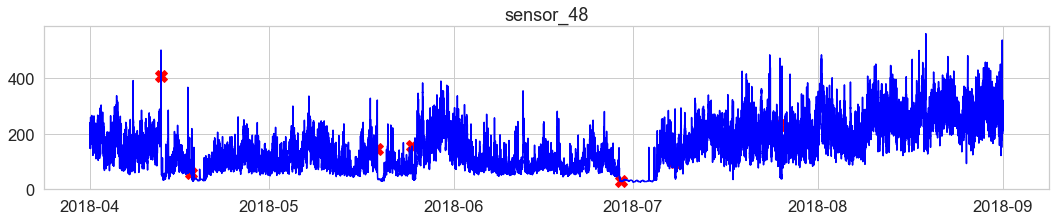

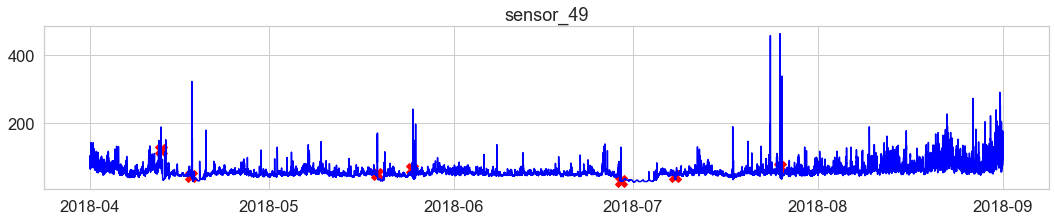

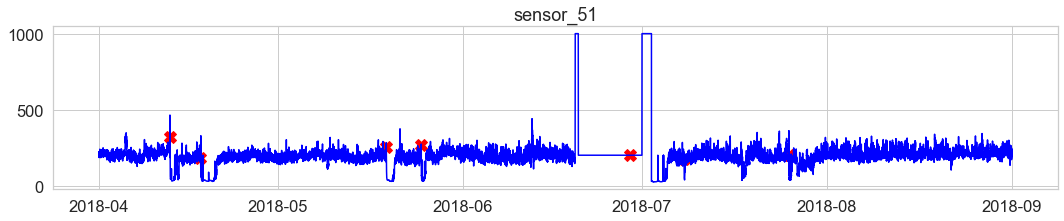

In [ ]:
#extract the readings from the Broken state of the pump
broken= sensor_df[sensor_df['Status']==0]

#Extract the name of the numerical columns
sensor_df_2 = sensor_df.drop(['Status'],axis=1)
names= sensor_df_2.columns

#plot timeseries for each sensor with Broken state marked with X in red color

for name in names:
    _=plt.figure(figsize=(18,3))
    _=plt.plot(broken[name],linestyle='none',marker='X',color='red',markersize=12)
    _=plt.plot(sensor_df[name],color='blue')
    _=plt.title(name)
    plt.show()

In [ ]:
broken

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,Status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,324.652800,0
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,183.738400,0
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,257.523100,0
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,267.361100,0
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,202.699667,0
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,174.768500,0
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,36.458330,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,205.729200,0


**DATA PRE_PROCESSING AND DIMENSIONALITY REDUCTION**

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#dropping the target column from the dataframe
sensor_df_2 = sensor_df.drop('Status',axis=1)
col_names=sensor_df_2.columns

#scaling
scaler=StandardScaler()
sensor_df_2_scaled= scaler.fit_transform(sensor_df_2)
sensor_df_2_scaled = pd.DataFrame(sensor_df_2_scaled,columns=col_names)

In [ ]:
sensor_df_2_scaled.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
1,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
2,0.180129,-0.072613,0.639386,1.093565,0.334786,0.008647,-0.082656,0.089329,0.207112,0.101892,...,-0.619939,-0.358970,-0.200379,-0.285516,1.737092,0.204388,-0.588641,0.061668,0.522906,0.009499
3,0.219228,-0.151675,0.627550,1.093564,0.260045,0.207693,-0.086035,0.185835,0.246628,0.136839,...,-0.619939,-0.384354,-0.271121,-0.310513,1.692010,0.204388,-0.588642,0.061668,0.507790,0.004024
4,0.182573,-0.138499,0.639386,1.093564,0.317909,0.184568,-0.069133,0.169195,0.246628,0.136839,...,-0.553995,-0.384354,-0.223959,-0.335509,1.714550,0.241389,-0.533219,0.089816,0.492674,-0.012402


**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(sensor_df_2_scaled)

PCA()

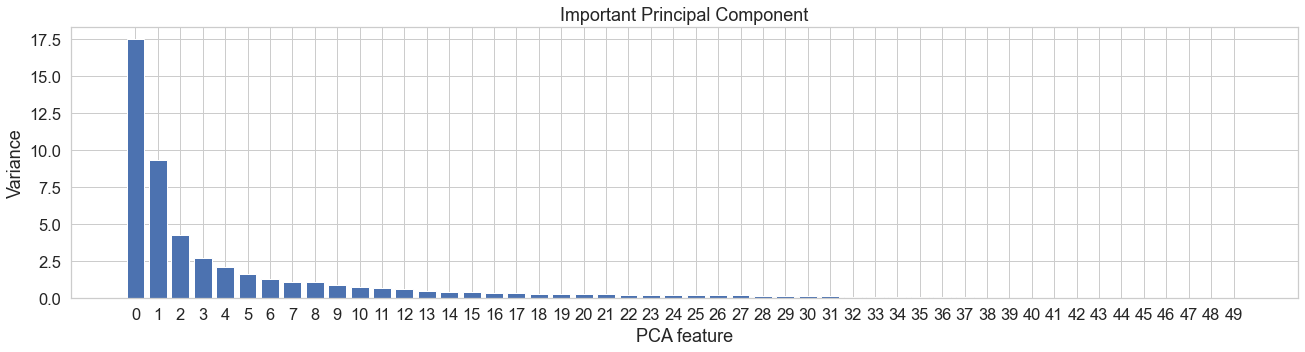

In [ ]:
#plot the principal components
features = range(pca.n_components_)
_=plt.figure(figsize=(22,5))
_=plt.bar(features,pca.explained_variance_)
_=plt.xlabel('PCA feature')
_=plt.ylabel('Variance')
_=plt.xticks(features)
_=plt.title('Important Principal Component')
plt.show()

In [ ]:
#calculate PCA with 2 components
pca = PCA(n_components=2)
pComponents = pca.fit_transform(sensor_df_2_scaled)
principal_df = pd.DataFrame(data = pComponents,columns=['pca1','pca2'])

In [ ]:
principal_df.head()

,pca1,pca2
0,-0.046056,0.490524
1,-0.046056,0.490524
2,-0.186309,0.500354
3,-0.186651,0.538034
4,-0.142655,0.645878


**Stationarity & Autocorrelation**

In [ ]:
#Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
#run Augmented Dickey Fuller Test
result = adfuller(principal_df['pca1'])

#print p-value
print(result[1])

0.0001422261454680581


In [ ]:
#autocorrelation

#compute change in daily mean
pca1= principal_df['pca1'].pct_change()

#Compute Autocorelation
autoco = pca1.dropna().autocorr()
print('Autocorrelation is:',autoco)

Autocorrelation is: -7.216171624480364e-06


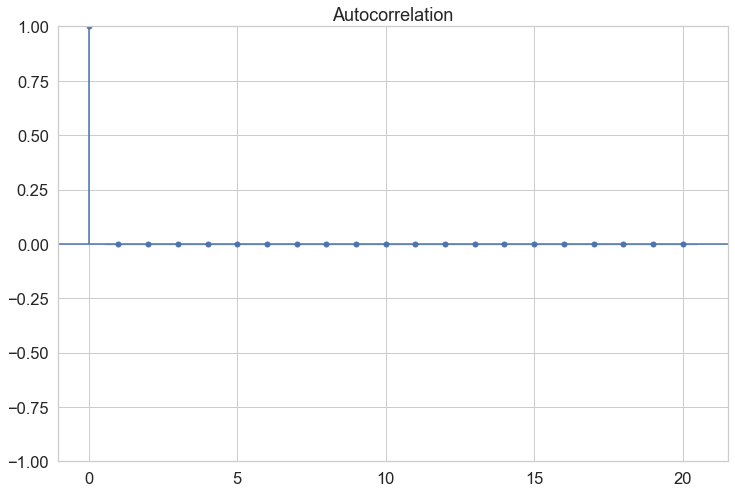

In [ ]:
#plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(),lags=20,alpha=0.05)
plt.show()

**MODELING**

**Model-1 K-Means Clustering**

In [ ]:
#import kmeans
from sklearn.cluster import KMeans

In [ ]:
#initialize and fit kmeans
kmeans = KMeans(n_clusters=2,random_state=13)
kmeans.fit(principal_df.values)

KMeans(n_clusters=2, random_state=13)

In [ ]:
#prediction
labels = kmeans.predict(principal_df.values)

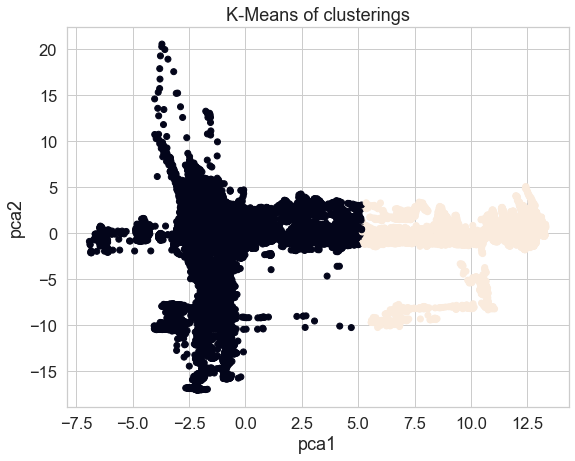

In [ ]:
#plotting the clusters
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'],c=labels)
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('K-Means of clusterings')
plt.show()

In [ ]:
#write a function that calucalates distance between each point and the centroid of the closest cluster


def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster,
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [ ]:
# Assume that 13% of the entire data set are anomalies
outliers_fraction = 0.13

# get the distance between each point and its nearest centroid.
# the biggest distances are considered as anomaly
distance = getDistanceByPoint(principal_df, kmeans)

# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))

# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

# anomaly1 contains the anomaly result of the above method Cluster (0:normal, 1:anomaly)
principal_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [ ]:
principal_df.head()

,pca1,pca2,kmeans_anomaly
0,-0.046056,0.490524,0
1,-0.046056,0.490524,0
2,-0.186309,0.500354,0
3,-0.186651,0.538034,0
4,-0.142655,0.645878,0


In [ ]:
principal_df["kmeans_anomaly"].value_counts()

kmeans_anomaly
0    191679
1     28641
Name: count, dtype: int64

#### Visualization over different sensors

In [ ]:
dfBroken = sensor_df[sensor_df["Status"]==0]

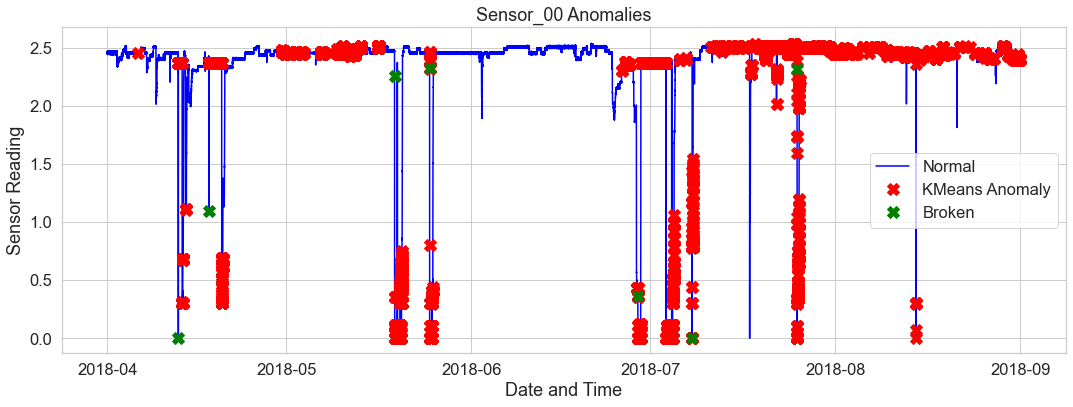

In [ ]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show()

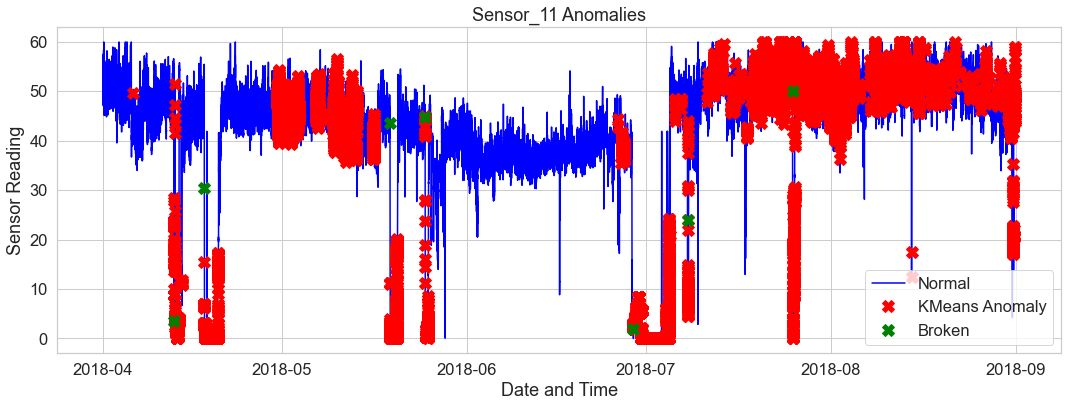

In [ ]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

#### Model 2 - Isolation Forest

In [ ]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest

In [ ]:
# fit and predict
model_if =  IsolationForest(random_state=13)

model_if.fit(principal_df.drop('kmeans_anomaly', axis = 1))

principal_df['if_anomaly'] = pd.Series(model_if.predict(principal_df.drop('kmeans_anomaly', axis = 1)))

In [ ]:
principal_df['if_anomaly'].value_counts()

if_anomaly
 1    172555
-1     47765
Name: count, dtype: int64

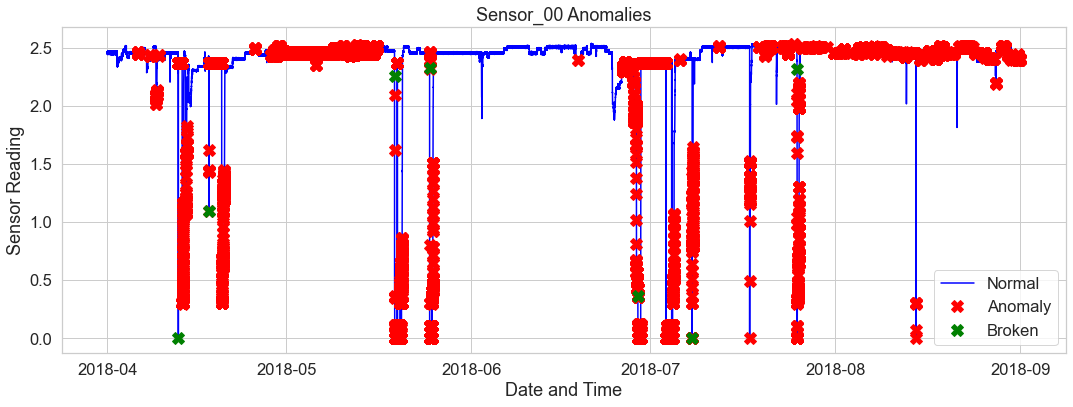

In [ ]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_00'], color='blue', label='Normal')
_ = plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc='best')
plt.show();

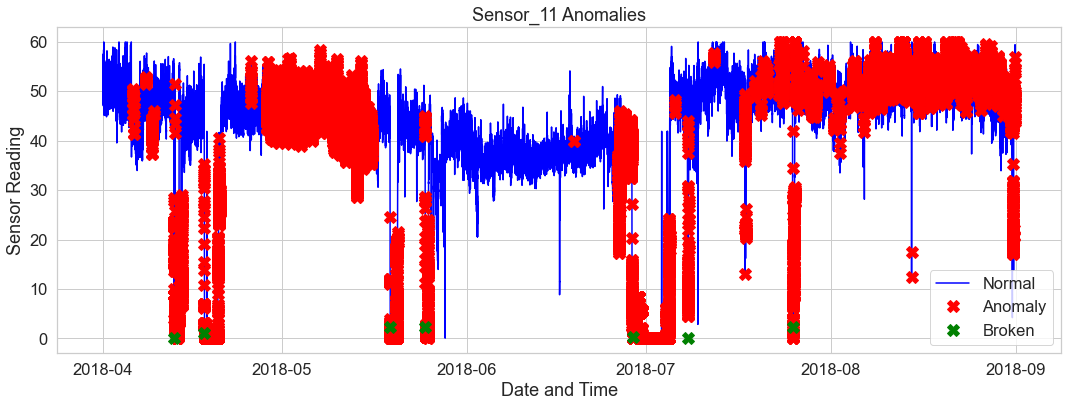

In [ ]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(sensor_df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

### Evaluation

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
predictions = sensor_df[['Status', 'kmeans_anomaly', 'if_anomaly']]

In [ ]:
# if anomaly uniformity. 1 is 0 and -1 is 1
predictions.loc[predictions["if_anomaly"] == 1, "if_anomaly"] = 0
predictions.loc[predictions["if_anomaly"] == -1, "if_anomaly"] = 1

In [ ]:
# turning machine status numerical
predictions["Status"] = predictions["Status"].map(
    {0: "Broken", 2: "Broken", 1: "Normal"})

In [ ]:
# turning machine status numerical
predictions["Status"] = predictions["Status"].map(
    {"Normal": 0, "Broken":1})

In [ ]:
predictions["Status"].value_counts()

Status
0    205836
1     14484
Name: count, dtype: int64

#### K-Means Evaluation

In [ ]:
# classification report
print(classification_report(predictions['Status'].values,
                            predictions['kmeans_anomaly'].values))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    205836
           1       0.47      0.93      0.62     14484

    accuracy                           0.93    220320
   macro avg       0.73      0.93      0.79    220320
weighted avg       0.96      0.93      0.94    220320



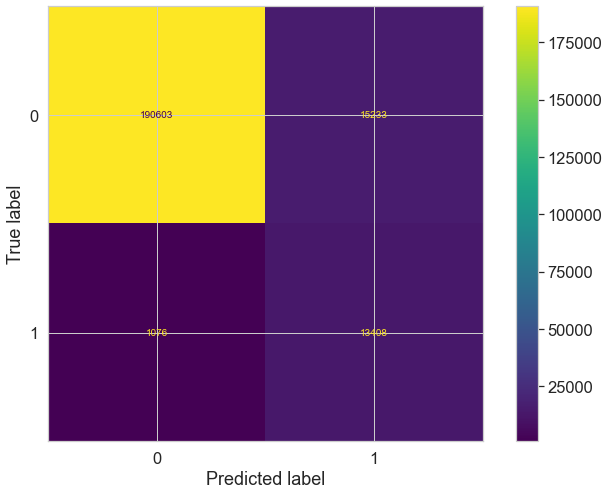

In [ ]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(predictions['Status'].values,
                                        predictions['kmeans_anomaly'].values)
plt.show()

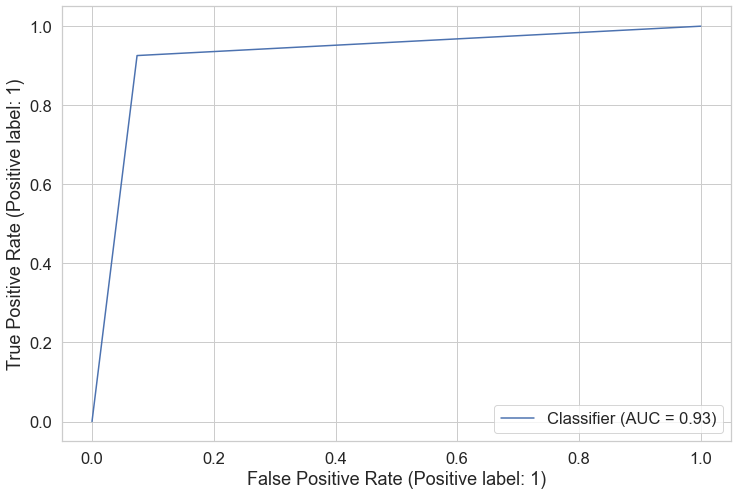

In [ ]:
# roc curve
RocCurveDisplay.from_predictions(predictions['Status'],
                                 predictions['kmeans_anomaly'])
plt.show()

#### Isolation Forest Evaluation

In [ ]:
print(classification_report(predictions['Status'],
                            predictions['if_anomaly']))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    205836
           1       0.30      0.98      0.46     14484

    accuracy                           0.85    220320
   macro avg       0.65      0.91      0.68    220320
weighted avg       0.95      0.85      0.88    220320



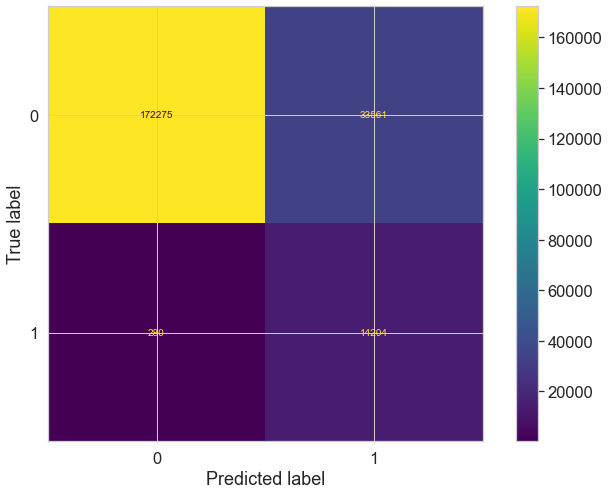

In [ ]:
ConfusionMatrixDisplay.from_predictions(predictions['Status'],
                                        predictions['if_anomaly'])
plt.show()

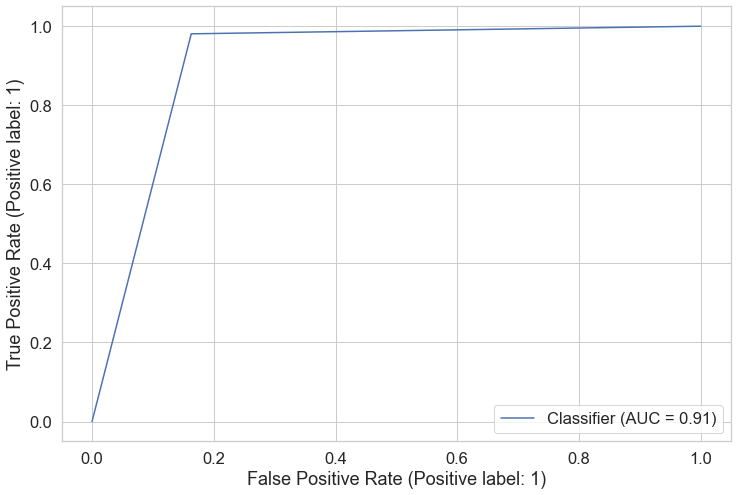

In [ ]:
RocCurveDisplay.from_predictions(predictions['Status'],
                                 predictions['if_anomaly'])
plt.show()

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---